In [5]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from scipy import stats

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, phi]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 2 seconds.


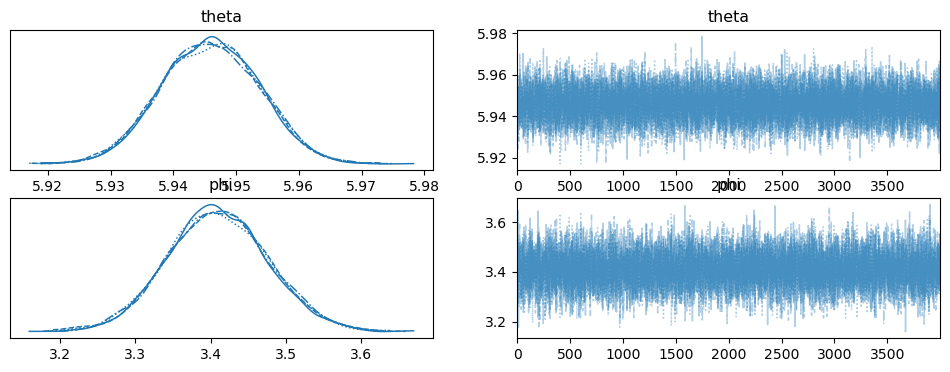

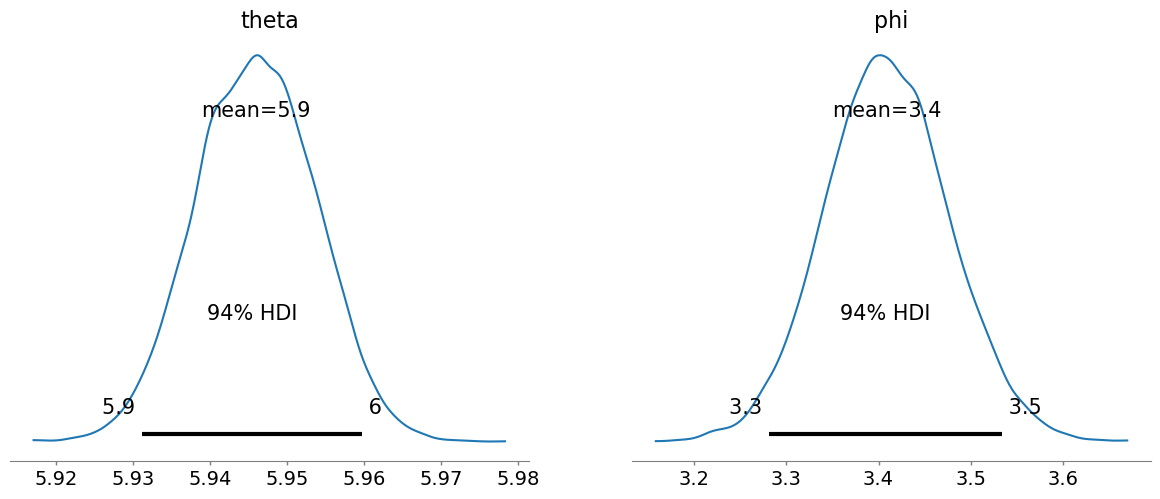

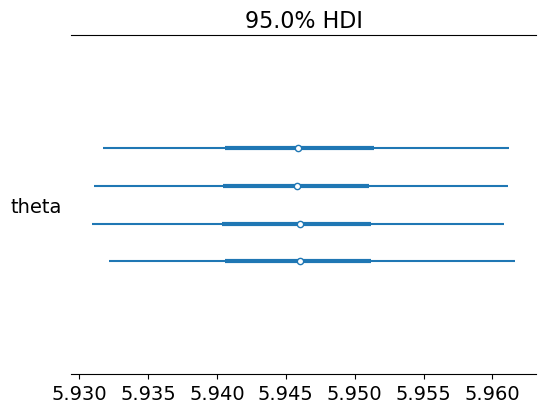

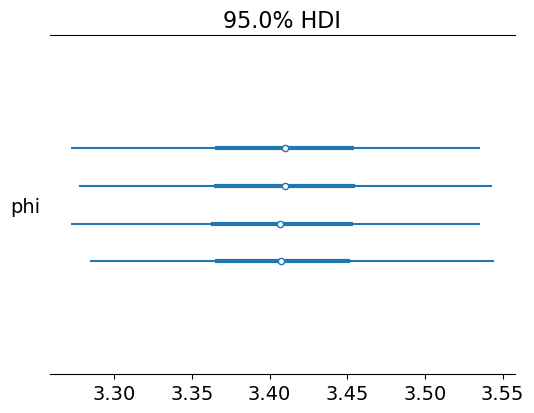

In [53]:
#read data
df = pd.read_csv('/Users/huayuchen/Desktop/2024 Winter /STA410/Week3/gender_classification_v7.csv')
#Provide posterior inference for a column of data with a PyMC *normal-gamma specification*.
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model: 
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=df['forehead_height_cm'])
    trace = pm.sample(4000, tune=1000)
    az.plot_trace(trace)
    az.plot_posterior(trace)
    plt.show()
    az.plot_forest(trace, var_names=["theta"], combined=False, hdi_prob=0.95)
    az.plot_forest(trace, var_names=["phi"], combined=False, hdi_prob=0.95);      


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 2 seconds.


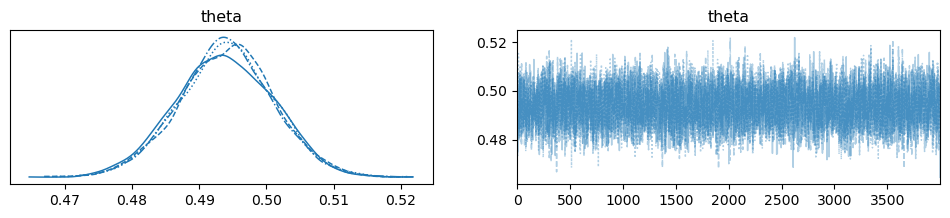

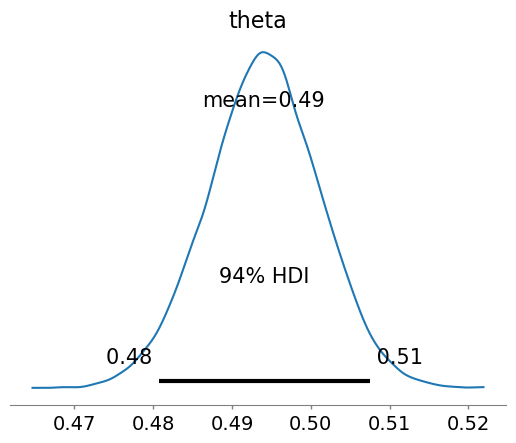

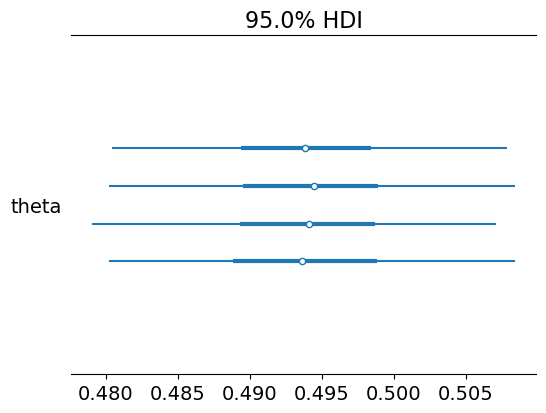

In [51]:
beta_binomial_toy_model = pm.Model()
with beta_binomial_toy_model: 
    theta = pm.Beta("theta", alpha=1, beta=1)
    x_obs = pm.Binomial("likelihood", n=1, p=theta, observed=df['nose_wide'])
    trace = pm.sample(4000, tune=1000)
    az.plot_trace(trace)
    az.plot_posterior(trace)
    plt.show()
    az.plot_forest(trace, var_names=["theta"], combined=False, hdi_prob=0.95);